In [2]:
#Load packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc4
sys.path.append("/home2/datahome/tpicard/python/Python_Modules_p3_pyticles/")

import torch
from torch.utils.data import DataLoader, Dataset

def read_input():
    nc_name = 'Inputs_vertical_levels.nc'
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/CNN_DATA/{0}'.format(nc_name),'r')
    inputs_test = np.asfortranarray(nc.variables['inputs_test'])
    inputs_train = np.asfortranarray(nc.variables['inputs_train'])
    nc.close()
    return(inputs_test,inputs_train)

def read_output():
    nc_name = 'pdf_vertical_levels.nc'
    nc = nc4.Dataset('/home2/datawork/tpicard/Pyticles/OUTPUTS/PDF/{0}'.format(nc_name),'r')
    pdf_test = np.asfortranarray(nc.variables['pdf_test'])*((80/5)**2)
    pdf_train = np.asfortranarray(nc.variables['pdf_train'])*((80/5)**2)
    nc.close()
    return(pdf_test,pdf_train)

class Pdf_Image_DataSet(Dataset):
    def __init__(self,images, pdf,transform=None):
        
        self.pdf = pdf
        self.images = images
        self.transform = transform

    def __len__(self):
        return self.pdf.shape[0]

    def __getitem__(self, idx):
        # select coordinates
        pdf_sample = self.pdf[idx,:,:,:,:]
        image_sample = self.images[idx,:,:,:]
        
        if self.transform:
            pdf_sample = self.transform(pdf_sample)
            image_sample = self.transform(image_sample)
            
        return image_sample, pdf_sample

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, sample):
        return torch.FloatTensor(sample)

from torch import nn
from torch import optim
import progressbar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# hyperparameters
batch_size = 30


(pdf_test,pdf_train) = read_output()
(inputs_test,inputs_train) = read_input()

## reduce size dataset
train_set = Pdf_Image_DataSet(inputs_train,pdf_train,transform= ToTensor())
train_loader = DataLoader(train_set, batch_size=batch_size, num_workers = 0, shuffle = True, drop_last=False)

test_set = Pdf_Image_DataSet(inputs_test,pdf_test,transform= ToTensor())
test_loader = DataLoader(test_set, batch_size=batch_size, num_workers = 0, shuffle = True, drop_last=False)

In [4]:
# Check the shape of inputs and outputs

for X, y  in test_loader:
    X, y  = X.to(device), y.to(device)
    print("Shape of X [N, C, H, W]: ", X.shape,X.device)
    print("Shape of y: ", y.shape, y.device)
    break

Shape of X [N, C, H, W]:  torch.Size([30, 52, 100, 100]) cuda:0
Shape of y:  torch.Size([30, 9, 1, 50, 50]) cuda:0


In [5]:
from torch import nn
from torch import optim
import progressbar
import pytorch_lightning as pl
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)

def bhatta_loss(output,target):
    epsilone = 1e-30
    out = torch.sum(1 - torch.sum(torch.sqrt(torch.abs((torch.mul(output, target)+epsilone))),axis=(2,3)))
    return out

In [22]:
# Achitecture of the model 
'''
weights = torch.Tensor([[1/9, 1/9, 1/9], [1/9, -1/9, 1/9], [1/9, 1/9, 1/9]]).unsqueeze(0).unsqueeze(0)
weights.requires_grad = True
with torch.no_grad():
    conv.weight = nn.Parameter(weights)
'''

class cnn_parallele(pl.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.cnn0 = nn.Sequential(    
            

            nn.Conv2d(1, 2, kernel_size=5, padding=2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)

            
            #nn.Conv2d(1, 1, kernel_size = 3, padding = 1),
            #nn.ReLU(True)
            #nn.Flatten(start_dim=1, end_dim=- 1)
            
    )
            
        self.cnn1 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn2 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn3 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn4 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn5 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn5 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn6 = nn.Sequential(    
            
            nn.Conv2d(53, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 1, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn7 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn8 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        self.cnn9 = nn.Sequential(    
            
            nn.Conv2d(52, 26, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(26, 10, kernel_size = 5, padding = 2, bias=False),
            nn.ReLU(True),
            nn.Conv2d(10, 2, kernel_size = 5, padding = 2, bias=False),
            #nn.Flatten(start_dim=1, end_dim=- 1)
            #nn.Softmax(dim=1)
    )
        
        

        self.softmax = nn.Softmax(dim=1)
        self.flatten = nn.Flatten(start_dim=1, end_dim=- 1)
        self.avgpool2d = nn.AvgPool2d(2)
        self.conv2d = nn.Conv2d(2, 1, kernel_size = 1, padding = 0, bias=False)
        self.relu = nn.ReLU(True)
        
    def forward(self, z, y):
        
        y_hat = torch.clone(y)
        functions = [self.cnn1,self.cnn2,self.cnn3,self.cnn4,self.cnn5,self.cnn6,self.cnn7,self.cnn8,self.cnn9]
        i = 5
        z = self.avgpool2d(z)
        y_hat_j = y_hat[:,i-1,:,:,:]
        for j in range(0,1,1):

            z_cat = torch.cat((y_hat_j,z),dim = 1)
            z_i = functions[j](z_cat)
            #z_i = self.flatten(z_i)
            #y_before = self.flatten(y_hat_j)
            #out =  y_before + z_i
            #out = self.relu(out)
            #out = self.softmax(torch.log(out))
            #y_hat_j = out.view(out.shape[0],1,50,50)
            
        #y_hat[:,i,:,:,:] = y_hat_j
            
        return z_i
    
    def configure_optimizers(self):
        lr = 0.001
        optimizer = optim.Adam(self.parameters(),lr= lr, betas=(0.5, 0.999),weight_decay=0)
        return optimizer
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        #weight = torch.tensor([10,10,10,5,5,5,1,1,1])
        #loss = bhatta_loss(y_hat, y)
        loss = 10e6*F.mse_loss(y_hat, y)
        #print(loss.shape)
        self.log("my_loss", loss, on_step=True, on_epoch=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        #val_loss = bhatta_loss(y_hat, y)
        val_loss = 10e6*F.mse_loss(y_hat, y)
        self.log('valid_loss', val_loss, on_step=True, on_epoch=True)
        #return val_loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x,y)
        #loss = bhatta_loss(y_hat, y)
        loss = 10e6*F.mse_loss(y_hat, y)
        self.log('test_loss', loss)
        return loss
    
    '''
    def validation_epoch_end(self,outputs):
        
        val_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        x_hat = outputs[-1]['x_hat']

        grid = torchvision.utils.make_grid(x_hat)
        self.logger.experiment.add_image('images', grid, 0)

        log = {'avg_val_loss': val_loss}
        return {'log': log, 'val_loss': val_loss}
    '''

In [35]:
trainer.test(autoencoder,dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-dcb0ca9d-55d4-28a2-1aa7-2638e1a18e28]


Testing: 100%|██████████| 17/17 [00:00<00:00, 19.68it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 17/17 [00:00<00:00, 18.00it/s]


[{}]

In [21]:
# init model
autoencoder = cnn_parallele()
trainer = pl.Trainer(max_epochs=3,gpus=1,default_root_dir='lightning_logs/CNN2') #(if you have GPUs)
#trainer = pl.Trainer()
trainer.fit(model=autoencoder, train_dataloaders=train_loader,val_dataloaders=test_loader)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-739dfd1b-f418-cc5b-11cf-7fb8737907b5]

   | Name      | Type       | Params
------------------------------------------
0  | cnn0      | Sequential | 50    
1  | cnn1      | Sequential | 41.2 K
2  | cnn2      | Sequential | 41.2 K
3  | cnn3      | Sequential | 41.2 K
4  | cnn4      | Sequential | 41.2 K
5  | cnn5      | Sequential | 41.2 K
6  | cnn6      | Sequential | 41.2 K
7  | cnn7      | Sequential | 40.8 K
8  | cnn8      | Sequential | 40.8 K
9  | cnn9      | Sequential | 40.8 K
10 | softmax   | Softmax    | 0     
11 | flatten   | Flatten    | 0     
12 | avgpool2d | AvgPool2d  | 0     
13 | conv2d    | Conv2d     | 2     
14 | relu      | ReLU       | 0     
------------------------------------------
369 K     Trainable params
0         Non-trainable params
369 K     Total params
1.479     Total estimated model params size (MB)


Epoch 0:  91%|█████████ | 164/181 [00:09<00:00, 17.49it/s, loss=40.5, v_num=27]
Validating: 0it [00:00, ?it/s]
Epoch 1:  91%|█████████ | 164/181 [00:09<00:00, 17.57it/s, loss=40.7, v_num=27]
Validating: 0it [00:00, ?it/s]
Epoch 2:  91%|█████████ | 164/181 [00:09<00:00, 17.57it/s, loss=40, v_num=27]  
Validating: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 181/181 [00:10<00:00, 17.62it/s, loss=40, v_num=27]


# Visual test on the last prediction

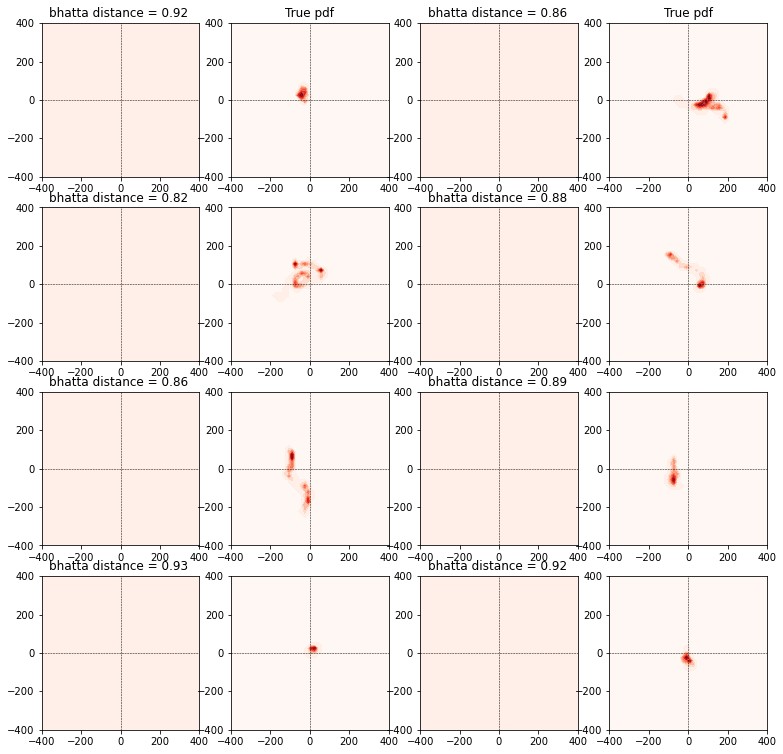

In [19]:
dz = 5

with torch.no_grad():
    for batch, (X, y ) in enumerate(test_loader):
        X, y  = X.to(device), y.to(device)
        autoencoder = autoencoder.to(device)
        pred = autoencoder(X,y)[:,dz,:,:,:]

        
xband, yband = np.linspace(-400,400,51), np.linspace(-400,400,51)

fig = plt.figure(figsize=(13,13))

#n_sample = 3
i = 0
#levels=np.logspace(-4, -1, 10)
cmap = 'Spectral_r' 
cmap = 'Reds'
cmap_blue = 'Blues' 
norm= colors.LogNorm(vmin=1e-4, vmax=1e-1)
lon = np.linspace(-400,400,50)
lat = np.linspace(-400,400,50)

for n_sample in range(0,8,1):
    
    ax = fig.add_subplot(4,4,i*2+1)
    levels=np.linspace(0,np.max(pred[n_sample,0,:,:].cpu().detach().numpy()), 10)
    levels=np.linspace(0,np.max(y[n_sample,dz,0,:,:].cpu().detach().numpy()), 10)
    #cb.ax.tick_params(labelsize='large')
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])

    plt.contourf(lon, lat, pred[n_sample,0,:,:].cpu().detach().numpy(),  levels, cmap=cmap, extend='both',alpha = 0.8)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    loss_prediction = 1 - torch.sum(torch.sqrt(torch.abs((torch.mul(pred[n_sample,0,:,:], y[n_sample,dz,0,:,:])))))
    loss_prediction = np.round(loss_prediction.cpu().detach().numpy(),3)
    '''
    plt.pcolormesh(lon,lat,pred[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Reds,alpha = 1)
    #plt.pcolormesh(lon,lat,y[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Blues,alpha = 0.5)
    '''
    #if i == 3 : plt.xlabel('km', fontsize=12)
    #plt.ylabel('km', fontsize=12)
    plt.title('bhatta distance = {:.2f} '.format(loss_prediction))
    #cb = plt.colorbar()
    #cb.set_ticks([1e-3, 1e-2])
    
    ax = fig.add_subplot(4,4,i*2+2)
    ax.set_xlim([-400,400])
    ax.set_ylim([-400,400])
    
    levels=np.linspace(0,np.max(y[n_sample,dz,0,:,:].cpu().detach().numpy()), 10)
    plt.contourf(lon, lat, y[n_sample,dz,0,:,:].cpu().detach().numpy(),  levels, cmap=cmap, extend='both',alpha = 0.8)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    '''
    plt.pcolormesh(lon,lat,y[n_sample,0,:,:].cpu().detach().numpy(),cmap = plt.cm.Reds)
    '''
    #if i == 3 : plt.xlabel('km', fontsize=12)
    #plt.ylabel('km', fontsize=12)
    if i ==0 : plt.title('True pdf')
    if i ==1 : plt.title('True pdf')
    #cb = plt.colorbar()
    #cb.set_ticks([1e-3, 1e-2])
    
    i = i+1
#plt.savefig('prediction_200m.png')

In [44]:
bhatta_cnnV2_bias_false = loss_distribution(test_loader,autoencoder.to(device))
#plt.savefig('distri_par_couche_sans_softmax.png')

0.28842437


In [40]:
def loss_distribution(test_loader,model):

    max_bhatta = 0
    min_bhatta = 1
    list_level = [1000,900,800,700,600,500,400,300,200]
    #fig = plt.figure(figsize=(15,15))
    i =0
    bhatta_cnnV2_bias_false = np.zeros((9,500))
    with torch.no_grad():
        for z in range(5,6):
            i = 0
            for batch, (X, y) in enumerate(test_loader):

                # TRAIN MODEL
                X, y = X.to(device), y.to(device)
                prediction_test = model(X,y)
                loss_prediction_test = 1 - torch.sum(torch.sqrt(torch.abs((torch.mul(prediction_test[:,z,:,:,:], y[:,z,:,:,:])))),axis=(2,3))
                if i ==0:
                    bhatta_list = loss_prediction_test
                    i=i+1
                else :
                    bhatta_list = torch.cat((bhatta_list,loss_prediction_test),0)
                    
            #ax = fig.add_subplot(3,3,z+1)
            #bin = np.linspace(0,1,11)
            #plt.print(np.mean(bhatta_list))
            #plt.hist(bhatta_list.cpu().detach().numpy(), bins=bin, density=True)
            #plt.title('z= {0} m'.format(-list_level[z]), fontsize=12)
            #plt.xlabel('bhatta loss')
            #plt.ylabel('Density')
            #plt.grid()
            #plt.axvline(x=0.3,color='black',linestyle='--',linewidth=0.5)
            #plt.xlim(0,1)
            #bhatta_cnnV2_bias_false[z] = bhatta_list.cpu().detach().numpy()[:,0]
            #plt.ylim(0,10)
    return print(np.mean(bhatta_list.cpu().detach().numpy()))

In [69]:
plt.ylim(top=3)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylim'

In [15]:
n_sample = 4
np.sum(pred[n_sample,0,:,:].cpu().detach().numpy())

1.0

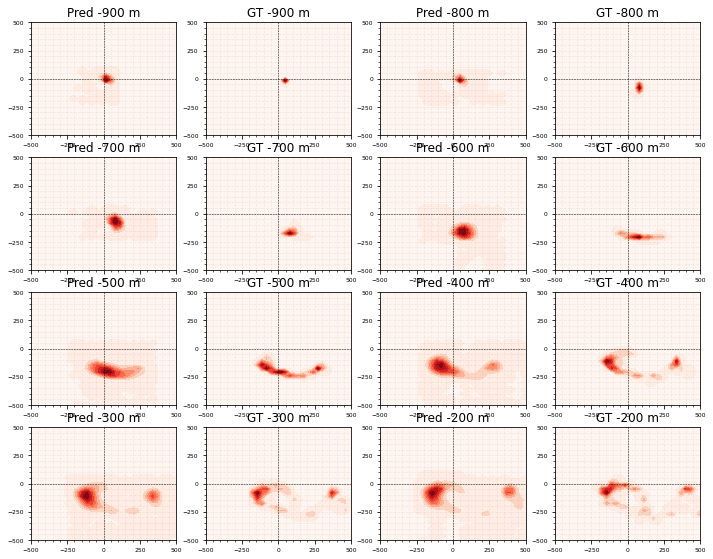

In [58]:
%matplotlib inline
with torch.no_grad():
    for batch, (X, y) in enumerate(test_loader):

        # TRAIN MODEL
        X, y = X.to(device), y.to(device)
        autoencoder = autoencoder.to(device)
        prediction_test = autoencoder(X,y)
        
list_level = [1000,900,800,700,600,500,400,300,200]
fig = plt.figure(figsize=(12,12))

i_sample = 5

for n in range(1,9):
    
    levels=np.linspace(0, np.max(prediction_test[i_sample,n,0,:,:].cpu().detach().numpy()), 10)
    
    ax = fig.add_subplot(5,4,2*n-1)
    cmap = 'Spectral_r'
    cmap = 'Reds'
    xband, yband = np.linspace(-800,800,51), np.linspace(-800,800,51)
    jpdf = prediction_test[i_sample,n,0,:,:].cpu().detach().numpy()
    #norm= colors.LogNorm(vmin=1e-4, vmax=1e-1)
    #ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf,  levels, norm=norm, cmap=cmap, extend='both')
    ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf,levels, cmap=cmap, extend='both')
    #cb = fig.colorbar(ctf, ax=ax)
    #cb.set_ticks([1e-5, 1e-4])
    #cb.set_label('[km' + r'$^{-2}$' + ']', fontsize=16, rotation=270)
    ax.set_xlim([-500,500])
    ax.set_ylim([-500,500])

    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    plt.xticks([-500,-250,0,250,500])
    plt.yticks([-500,-250,0,250,500])
    plt.tick_params(labelsize=6)
    plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.1)
    plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.1)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.title('Pred {0} m'.format(-list_level[n]), fontsize=12)
    
    levels=np.linspace(0, np.max(y[i_sample,n,0,:,:].cpu().detach().numpy()), 10)
    
    ax = fig.add_subplot(5,4,n*2)
    jpdf = y[i_sample,n,0,:,:].cpu().detach().numpy()
    ctf = ax.contourf(0.5*(xband[:-1]+xband[1:]), 0.5*(yband[:-1]+yband[1:]), jpdf,levels,cmap=cmap, extend='both')
    #cb = fig.colorbar(ctf, ax=ax)
    #cb.set_ticks([1e-5, 1e-4])
    #cb.set_label('[km' + r'$^{-2}$' + ']', fontsize=16, rotation=270)
    ax.set_xlim([-500,500])
    ax.set_ylim([-500,500])

    plt.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
    plt.axhline(y=0,color='black',linestyle='--',linewidth=0.5)
    plt.xticks([-500,-250,0,250,500])
    plt.yticks([-500,-250,0,250,500])
    plt.tick_params(labelsize=6)
    plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.1)
    plt.grid(b=True, which='minor', color='gray', linestyle='--',alpha=0.1)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.title('GT {0} m'.format(-list_level[n]), fontsize=12)

In [15]:
a = torch.tensor([[1,2],[3,4]])
b = torch.mul(a,a)
print(b)

tensor([[ 1,  4],
        [ 9, 16]])


In [21]:
nc = nc4.Dataset('Comparison/bhatthacharya_data.nc','r+')
#print(nc.variables.keys())
nc.variables['bhatta_cnnV2'][:] = bhatta_cnnV2_bias_false
nc.close()

In [21]:
nc.close()

In [27]:
autoencoder = cnn_parallele().to(device)
with torch.no_grad():
    for batch, (X, y ) in enumerate(test_loader):
        X, y  = X.to(device), y.to(device)
prediction_test = autoencoder(X,y).cpu().detach().numpy()

In [29]:
prediction_test.shape

(20, 1, 50, 50)

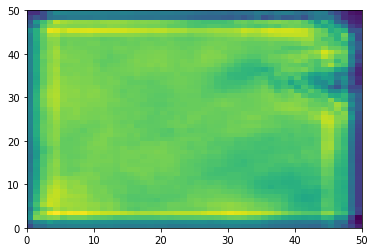

In [30]:
plt.pcolormesh(prediction_test[0,0,:,:])